# Финальный проект - Анализ товарного ассортимента

Ссылка на презентацию- https://docs.google.com/presentation/d/1JmzXZFQc5FIfn8tSACQt3g1YDW1Z1NQDMxLaSbwnm4c/edit?usp=sharing

Ссылка на дашборд - https://public.tableau.com/app/profile/irina3149/viz/Numberofpurchases/Dashboard1?publish=yes

## Цель и задачи проекта 

    В Интернет-магазине товаров для дома «Пока все ещё тут» нужно сделать полноценный анализ товарного ассортимента.
              Цель проекта: 
               - Анализировать товарный ассортимент и сформировать рекомендации для дальнейшего развития.
               
             Задачи проекта:
               - провести исследовательский анализ данных;
               - проанализировать торговый ассортимент;
               - сформулировать и проверить статистические гипотезы.
               
          Описание данных:
          
          date - дата заказа;
          customer_id - идентификатор покупателя;
          order_id- идентификатор заказа;
          product- наименование товара;
          quantity- количество товара в заказе;
          price- цена товара.
          

## Изучение данных в датасете

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from IPython.display import display
import datetime as dt
import re

Прочитаем файл и посмотрим первые 5 строк.

In [2]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv')
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
data.info()# посмотрим типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [4]:
data.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [5]:
data['product'].unique()

array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', ...,
       'Сушилка для белья на ванну FREUDENBERG (GIMI) Alablock Varadero silver A4P',
       'Каланхое каландива малиновое d-7 см', 'Литопс Микс d-5 см'],
      dtype=object)

Посмотрим сколько наименований товаров.

In [6]:
data['product'].nunique()

2343

In [7]:
data['product'].value_counts()

Рассада Кабачка сорт Зебра кассета 6 шт E6                        79
Рассада Кабачка сорт Золотинка кассета 6 шт E6                    78
Рассада Кабачка сорт Белогор кассета 6 шт E6                      77
Рассада Кабачка сорт Горный, кассета по 6шт                       76
Рассада Огурец Фараон ячейки по 6 шт Е6                           76
                                                                  ..
Примула комнатная D9 см розовая                                    1
Роза садовая спрей в горшке Мими Эден                              1
Гладильная доска Eurogold Basic Reflector 110х30 см R20030A        1
Розмарин в горшке d-15 см                                          1
Флокс метельчатый сорт Земляничное суфле, диаметр горшка 10см.     1
Name: product, Length: 2343, dtype: int64

In [8]:
data['order_id'].value_counts()

14833    888
14835    203
14753     90
14897     63
70960     60
        ... 
70683      1
68636      1
72734      1
68640      1
71898      1
Name: order_id, Length: 2784, dtype: int64

## Предобработка данных

### Изменение типа данных в столбце даты

In [9]:
data['date']= pd.to_datetime(data['date'],format='%Y%m%d%H')

In [10]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [11]:
data['date'].max()

Timestamp('2019-10-31 16:00:00')

In [12]:
data['date'].min()

Timestamp('2018-10-01 00:00:00')

### Проверка данных на пропуски, дубликаты

Проверим на наличие пропусков.

In [13]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Проверим на наличие явных дубликатов.

In [14]:
data.duplicated().sum()

0

Проверим на наличие неявных дубликатов.

In [15]:
data[['customer_id', 'order_id', 'product']].duplicated().sum()

1886

In [16]:
dubl_data=data.groupby('order_id').agg({'date':'nunique'}).sort_values (by='date', ascending=False)
dubl_data

,date
order_id,
14833,74
70960,60
69162,23
71148,16
69531,12
...,...
69608,1
69611,1
69612,1


In [17]:
data.loc[data['order_id']==14833].sort_values (by='product', ascending=False)

,date,customer_id,order_id,product,quantity,price
5544,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цве...,1,210.0
5046,2019-06-10 20:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цве...,1,210.0
5291,2019-06-14 09:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цве...,1,210.0
4326,2019-06-02 16:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цве...,1,210.0
4672,2019-06-05 22:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цве...,1,210.0
...,...,...,...,...,...,...
5022,2019-06-10 15:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
5006,2019-06-10 10:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
4993,2019-06-10 09:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
4968,2019-06-10 07:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0


Удалим дубликаты.

In [18]:
data = (data[data[['customer_id', 'order_id', 'product']].duplicated(keep='last') != True])

### Проверка данных на аномалии, удаление выбросов

Построим боксплот и проверим есть ли в данных аномалии.

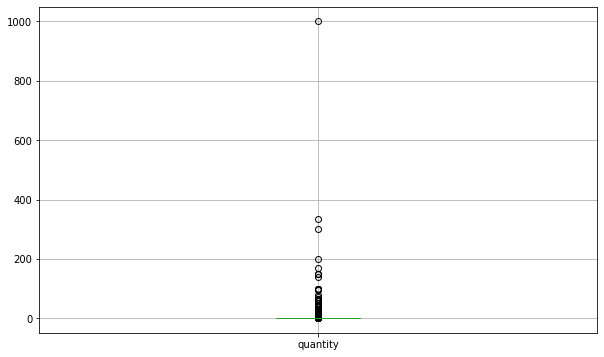

In [19]:
plt.figure(figsize=(10, 6))
data.boxplot('quantity')
plt.show;

Из графика видно,что количество товаров больше 100 - это выбросы, которые нас не интересуют и их можно удалить из анализа.

Также можно посмотреть распределение на гистограмме.

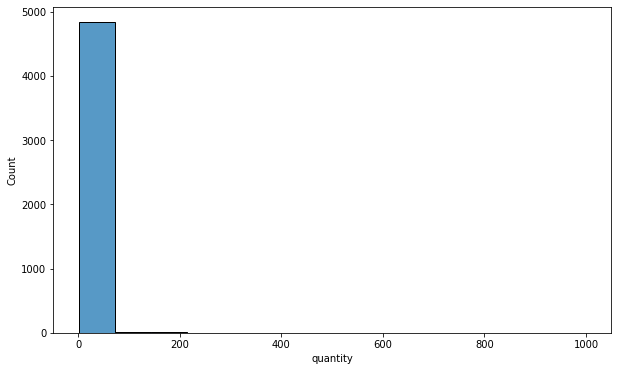

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['quantity'])
plt.show;

In [21]:
len(data[data['quantity']>100])

9

In [22]:
print('Доля выбросов  по столбцу quantity равно',(9/len(data))*100)

Доля выбросов  по столбцу quantity равно 0.1855287569573284


Доля выбросов незначительна, значит можно удалить из анализа данных.

In [23]:
 data=data[data['quantity']<100]
data.to_csv('data.csv', index=False)   

## Исследовательский анализ данных

Добавим в таблицу столбец выручки и день недели месяц.

In [24]:
data['revenue']= data['quantity']*data['price']
data['day week']= pd.DatetimeIndex(data['date']).weekday
data['month']= pd.DatetimeIndex(data['date']).month
data.head()

,date,customer_id,order_id,product,quantity,price,revenue,day week,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,0,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,0,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,0,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,0,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,0,10


Посмотрим теперь все уникальные значение наименования товара.

In [25]:
set(data['product'].unique())

{'Рассада Пеларгония (герань) зональная Блу Айз Mix смесь объем 0,5 л',
 'Кружка прозрачная 250 мл H8437 Luminarc Франция',
 'Сушилка для белья Colombo Star 18 3679',
 'Сушилка для белья настенная НИКА СН120 белая 120 см',
 'Подвесное кашпо Пеларгония махровая Calliope Dark Red темно-красная объем 4 л',
 'Миксер электрический погружной DELTA DL-5061 белый с сиреневым 300 Вт 5 скоростей',
 'Калатея Кроката d-15 см',
 'Тарелка обеденная ГРИН ОД 25 см G0707 Luminarc',
 'Тарелка суповая КУТЮР 22,5 см J2397 Luminarc',
 'Сушилка для белья Meliconi Miss Stendy',
 'Сумка-тележка хозяйственная Rolser IMX005 marengo Logic DOS+2 серая',
 'Стремянка COLOMBO FACTOTUM 3 ступени алюминий G110AT3W',
 'Кабачок Изумруд d-7 см раннеспелый',
 'Таз пластмассовый 15,0 л пищевой овальный "Ekko" 2775, 1404032',
 'Искусственный цветок Мимоза пластиковая желтая',
 'Клен ложноплатановый Леопольди в горшке 3,5 л',
 'томата (помидор) Абрикос №1 сорт индетерминантный среднеспелый красный',
 'Однолетнее растение Пор

Приведем название товара к нижнему регистру.

In [26]:
pd.set_option('chained_assignment', None)
data['product'] = data['product'].str.lower()
data.head()



,date,customer_id,order_id,product,quantity,price,revenue,day week,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,0,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,0,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,0,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,0,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,0,10


Сократим название товара до первой запятой.

In [27]:
data['product'] = data['product'].str.split(",")
data['product'] = data['product'].apply(lambda x: x[0]) 
data.head()

,date,customer_id,order_id,product,quantity,price,revenue,day week,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера,1,142.0,142.0,0,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика,1,194.0,194.0,0,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,0,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,0,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,0,10


Посчитаем количество строк в таблице data.

In [28]:
len(data)

4838

Составим словарь для определения категории товара.

In [29]:
dict_cat= {
    'товары для кухни': ['кухн','блюдце','миска','ваза','кувшин','бидон','кастрюля','овощ','продукт', 'тарелка', 'нож', 'салатник', 'чайник', 'банка', 'салфетка', 'рыбочистка','пищ', 'термос',
            'венчик','бульон','набор бокалов','вилка','сахарница','ложка','свч','выпечк', 'стакан','фужер','хлеб','варка','кружка','муляж','сковорода','блюдо','скатерть','соковыжималка','кондитер','набор фужеров','приборов','чай'],
    'товары для ванной комнаты и уборки': ['доска','перчатки','вантуз','мусор','ведро','веник','гладильн', 'ванн', 'влаговпитывающий', 'туалета', 'таз', 'щетка','средство','сантех'
             'мыл', 'коврик', 'нетканые салфетки', 'полотен', 'ткань универсальная', 'ёрш','дозатор','швабра','сушилка'],
    'растения и семена':['календ','петрушка','патиссон','пиретрум',' виноград','хризолидокарпус','циперус зумула','аквилегия','дендробиум','мимоза','тыква','артемизия','земляника','гербера','валериана','азалия','антуриум','бегония','антуриум','фален', 'растен','пеларгония','рассада','капуста','лаванда','томат','зверобой','юкка','герань','космея','молодило','флокс','нивянник','крокус','цикламен',
                         'эвкалипт','гортензия','радермахера','виола','вигна','цинния','огурец','аптения','калибрахоа','гвоздика','бадан','бархатцы','буддлея','хлорофитум','хризантема','адиантум','барвинок','роза','клубника','фиалка','комнатн','альбука','афеляндра','шеффлера','петуния','георгина','аспарагус','глоксиния','эхеверия','клен','фуксия','лантана','кипарисовик','вербена','кориандр','дыня','цитрофортунелла','папоротник','калла','бальзамин','горш','черенок','фатсия','астра','нефролепис','мелисса','ель','базилик','каланхое','арбуз','кабачок'],
'товары для спальни':['комод','бель','простын','комплект','покрывало','плед','одеяло','халат','наволочка','наматрацник','наматрасник'],
    'товары для прихожей':['обувница','этажерка','вешал','полки','придверн','обув','хранения','чехол'],
    'аксесcуары для дома':['исскуст','декор','композ','кашпо','цветок','сумка-тележка','стремянка','насадка','тележка','сумка','термометр'],
     'электротовары':['пылесос','электр','миксер','утюг','фен']}

Составим функцию для определения категории товара.

In [30]:
def categories(goods):
    for category, items in dict_cat.items():
        for item in items:
            if item in goods:
                return category
    return '1000 мелочей'

data['product_category']= data['product'].apply(categories)

In [31]:
data.head()

,date,customer_id,order_id,product,quantity,price,revenue,day week,month,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке алое вера,1,142.0,142.0,0,10,растения и семена
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,комнатное растение в горшке кофе арабика,1,194.0,194.0,0,10,растения и семена
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,0,10,растения и семена
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,0,10,растения и семена
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,0,10,растения и семена


Сгруппируем товары по категориям и посчитаем выручку.

In [32]:
df_cat= data.pivot_table(index='product_category',values='revenue',aggfunc='sum').sort_values(by='revenue',ascending= False).reset_index()
df_cat



,product_category,revenue
0,товары для ванной комнаты и уборки,1069282.0
1,аксесcуары для дома,824519.0
2,растения и семена,529734.0
3,товары для кухни,418224.0
4,1000 мелочей,217671.0
5,товары для прихожей,200980.0
6,товары для спальни,67527.0
7,электротовары,19805.0


Построим график по выручке в разрезе категорий товаров.

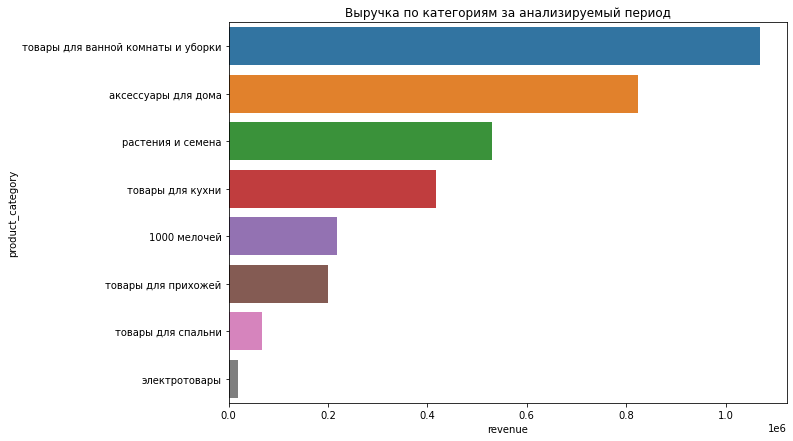

In [33]:
plt.figure(figsize=(10, 7))
sns.barplot(y='product_category', x='revenue', data=df_cat)
plt.title('Выручка по категориям за анализируемый период')
plt.show;

Из графика видно, что по размеру выручки можно выделить топ-5 категорий- аксессуары для дома,растения и семена,товары для ванной, товары для кухни,1000 мелочей. 

Теперь рассмотрим категории по количеству продаж.

In [34]:
df_count= data.pivot_table(index='product_category',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index()
df_count

,product_category,quantity
0,растения и семена,2158
1,товары для ванной комнаты и уборки,916
2,товары для кухни,776
3,аксесcуары для дома,452
4,1000 мелочей,334
5,товары для прихожей,160
6,товары для спальни,23
7,электротовары,19


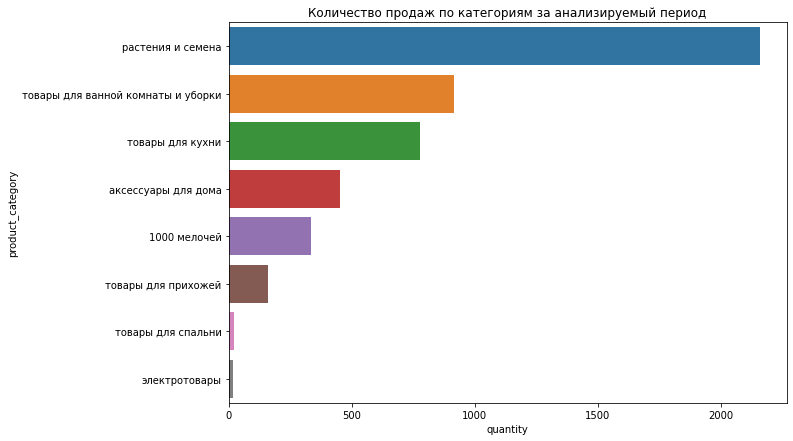

In [35]:
plt.figure(figsize=(10, 7))
sns.barplot(y='product_category', x='quantity', data=df_count)
plt.title('Количество продаж по категориям за анализируемый период')
plt.show;

Судя по графику, по количеству продаж другие лидеры- это категории- растения и семена,товары для кухни, товары для ванной,аксессуары для дома, 1000 мелочей.


Теперь рассмотрим каждую категорию в отдельности, какие там товары лидируют, а какие отстают.

In [36]:
plants_seed = data.query('product_category== "растения и семена"')
top_plants_seed=plants_seed.pivot_table(index='product',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index().query('quantity>30')


In [37]:

top_plants_seed

,product,quantity
0,герань домашняя (пеларгония зональная) цветуща...,96
1,пеларгония розебудная red pandora укорененный ...,66
2,пеларгония розебудная prins nikolai укорененны...,57
3,пеларгония зональная диам. 12 см сиреневый пол...,52
4,пеларгония розебудная mary укорененный черенок,39


Из таблицы видно, что лидирует в продажах герань домашняя и пеларгония розебудная, данные растения и будут основными товарами в категории- растения и семена.

In [38]:
min_plants_seed=plants_seed.pivot_table(index='product',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index().query('quantity==1')
min_plants_seed

,product,quantity
308,эвкалипт сильвердроп d-7 см h-30 см,1
309,эвкалипт сильвердроп в горшке d-7 см,1
310,рассада огурец кристина ячейки по 6 шт е6,1
311,цикламен d-12 см h-20 цвет в ассортименте,1
312,цикламен d-12 см h-20 см белый с малиновой сер...,1
...,...,...
750,молодило микс d-9 см,1
751,молодило в горшке d-12 см,1
752,многолетнее растение душица-орегано розовый об...,1
753,мелисса лекарственная d-9 см,1


Одними из редких 447 товаров ,которые покупают в одном экземпляре, будут дополнительными-  являются эвкалипт,цикломен,юкка и мелиса и рассада огурца.

In [39]:
prod_bathroom = data.query('product_category== "товары для ванной комнаты и уборки"')
top_prod_bathroom=prod_bathroom.pivot_table(index='product',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index().query('quantity>=10')
top_prod_bathroom

,product,quantity
0,сушилка для белья потолочная лиана 2,25
1,сушилка для белья потолочная лиана 1,20
2,сушилка для белья настенная zalger prima 510-7...,17
3,таз пластмассовый со стиральной доской (иж),10
4,штора со встроенными кольцами под штангу для в...,10


Из таблицы видно, что пользуется спросом и покупается сушилка для белья лиана 2, лиана 1 , штора и таз пластмассовый.

In [40]:
min_prod_bathroom = prod_bathroom.pivot_table(index='product',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index().query('quantity<2')
min_prod_bathroom

,product,quantity
178,сушилка для белья на стену leifheit rollquick ...,1
179,сушилка для белья настенная ника сн90 белая 90 см,1
180,сушилка для белья напольная gimi tempo super,1
181,сушилка для белья напольная colombo star 18,1
182,сушилка для белья виолет ricko 5м rk-5/100 нас...,1
...,...,...
479,лестница-стремянка dogrular ufuk оцинкованная ...,1
480,лестница-стремянка dogrular ufuk оцинкованная ...,1
481,кухонное полотенце махровое 42х28 см wellness ...,1
482,кухонное полотенце вафельное 64х38 см wellness...,1


В таблице представлены 306 наименований товаров,которые представлены в одном количестве.Значит менее популярны у покупателей. Значит они будут являться дополнительными.

In [41]:
kitchen_supplies=data.query('product_category== "товары для кухни"')
top_kitchen_supplies=kitchen_supplies.pivot_table(index='product',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index().query('quantity>=10')
top_kitchen_supplies

,product,quantity
0,рассада зелени для кухни розмарина в горшке ди...,14
1,рассада зелени для кухни розмарин блю лагун ди...,13
2,муляж баклажан 18 см,10
3,рассада зелени для кухни тимьян-чабрец розовый...,10
4,муляж яблоко зеленый 9 см полиуретан,10
5,рассада зелени для кухни базилик тонус,10


Как не странно,в категории  товарах для кухни пользуется спросом  рассада зелени для кухни и муляэ яблока и баклажана.

In [42]:
min_kitchen_supplies=kitchen_supplies.pivot_table(index='product',values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index().query('quantity<2')
min_kitchen_supplies

,product,quantity
127,скатерть арлет 50% полиэфир 50% хлопок овальна...,1
128,рыбочистка металлическая,1
129,салатник luminarc amбиантэ оранж 16 см l6417,1
130,салатник luminarc amбиантэ анис 16 см l6415,1
131,сервировочная салфетка пвх 26х41 см ванда 6001,1
...,...,...
434,набор эмалированных салатников metalloni рязан...,1
435,набор эмалированных салатников metalloni ветка...,1
436,набор фужеров для шампанского френч брассери 6...,1
437,набор фужеров для красного вина 235 мл,1


В таблице выше  представлены 312 товаров, которые покупается в одном экземпляре. Значит являются допольнительными.

 Теперь можно посмотреть количество продаж в разрезе категорий по месяцам. Только сделаем срез данных за период с 01.11.2018г. по 31.10.2019г., исключим данные за октябрь 2018г.

In [43]:
data= data.loc["2018-11-01 00:00:00":]

In [44]:
count_month = data.pivot_table(index=['product_category','month'],values='quantity',aggfunc='count').sort_values(by='quantity',ascending= False).reset_index()

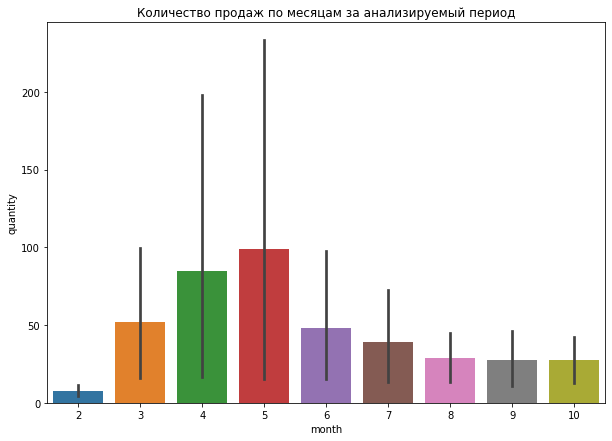

In [45]:
plt.figure(figsize=(10, 7))
sns.barplot(y='quantity', x='month', data=count_month)
plt.title('Количество продаж по месяцам за анализируемый период')
plt.show;

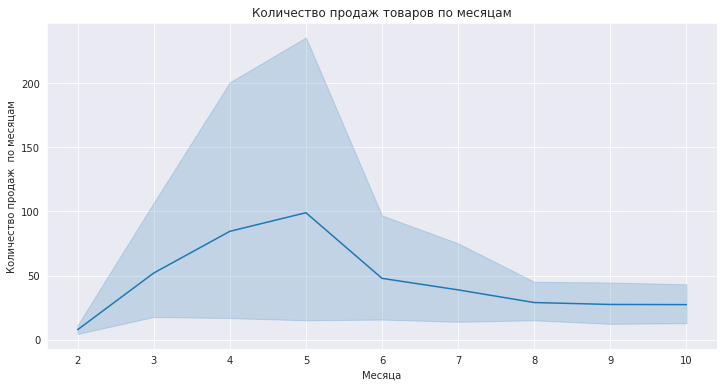

In [46]:
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    sns.lineplot(data =count_month, x = "month", y = "quantity");
    plt.xlabel('Месяца')
    plt.ylabel('Количество продаж  по месяцам')
    plt.title('Количество продаж товаров по месяцам');


    Из графиков очень  заметно, что количество продаж увеличивается с апреля. Наблюдается некоторая сезонность.
     
     Интересно за счет продаж каких категорий  повышается количество  продаж? 
     
    Для того,чтобы ответить на этот вопрос, рассмотрим  количество продаж в мае в разрезе категорий.

In [47]:
april= count_month. query('month ==4')
april

,product_category,month,quantity
1,растения и семена,4,472
9,товары для ванной комнаты и уборки,4,65
14,товары для кухни,4,56
18,аксесcуары для дома,4,47
35,1000 мелочей,4,22
44,товары для прихожей,4,10
56,товары для спальни,4,2
59,электротовары,4,2


Для наглядности сформируем график и посмотрим что за категории приносят нам увеличение продаж в апреле.

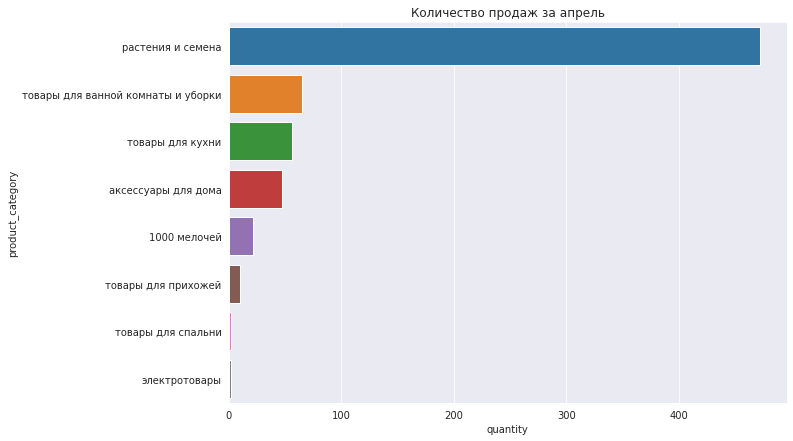

In [48]:
plt.figure(figsize=(10, 7))
sns.barplot(y='product_category', x='quantity', data=april)
plt.title('Количество продаж за апрель')
plt.show;

Выяснили в апреле продажи повышаются за счет категории растения и семена, это объясняется наступлением дачного сезона.

In [49]:
may = count_month. query('month ==5')
may

,product_category,month,quantity
0,растения и семена,5,488
5,товары для кухни,5,119
26,товары для ванной комнаты и уборки,5,30
28,аксесcуары для дома,5,27
37,1000 мелочей,5,19
45,товары для прихожей,5,9
62,товары для спальни,5,1


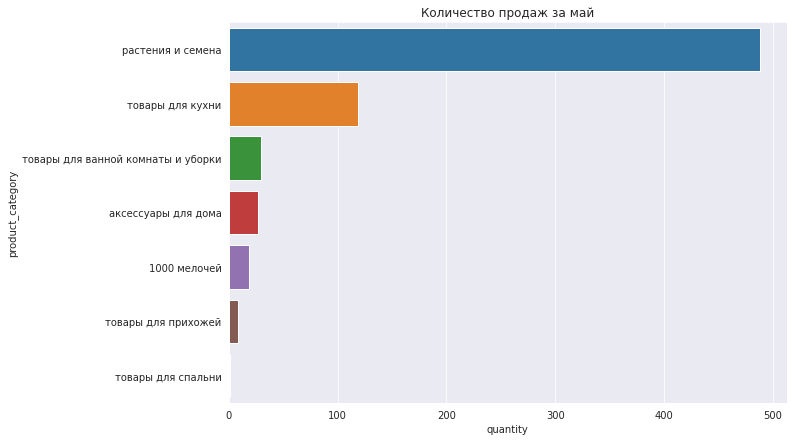

In [50]:
plt.figure(figsize=(10, 7))
sns.barplot(y='product_category', x='quantity', data=may)
plt.title('Количество продаж за май')
plt.show;

Из графика видно, что в мае продажи повышаются за счет трех категорий- растения и семена ,товары для кухни,товары для ванной и уборки.

 Теперь рассмотрим зависит ли количество продаж по дням недели. 

In [51]:
data['day week'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [52]:
dayweek = data.groupby('day week').agg({'quantity':'count'}).sort_values(by='quantity',ascending= False).reset_index()
dayweek

,day week,quantity
0,0,579
1,3,532
2,1,516
3,2,504
4,4,367
5,6,321
6,5,301


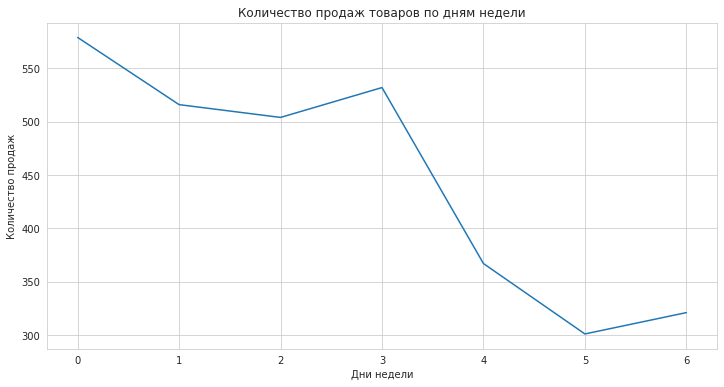

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=dayweek, x="day week", y="quantity")
plt.xlabel('Дни недели')
plt.ylabel('Количество продаж')
plt.title('Количество продаж товаров по дням недели');

Из графика видно, что в понедельник продажи больше,чем в другие дни. В четверг наблюдается небольшой рост, а затем снижение до субботы, а в воскресение заметен  рост.

Теперь посмотрим среднюю выручку по дням недели.

In [54]:
dayweek_revenue =data.groupby('day week').agg({'revenue':'mean'}).sort_values(by='revenue',ascending= False).reset_index()
dayweek_revenue

,day week,revenue
0,4,828.544959
1,2,606.061508
2,1,603.021318
3,6,571.803738
4,3,541.058271
5,5,499.887043
6,0,478.466321


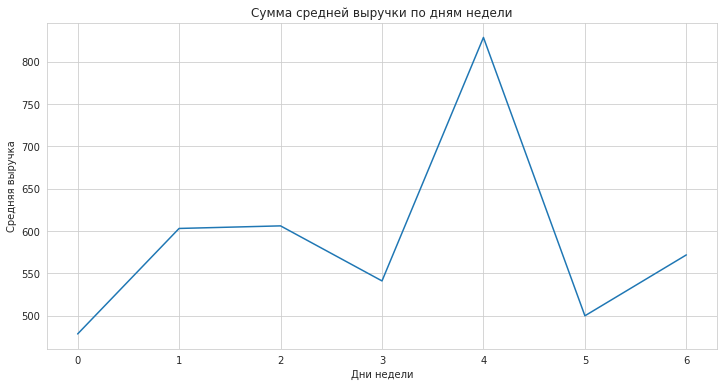

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=dayweek_revenue, x="day week", y="revenue")
plt.xlabel('Дни недели')
plt.ylabel('Средняя выручка')
plt.title('Сумма средней выручки по дням недели');

Из графика видно, что во четверг и в пятницу наблюдается рост средней выручки.

Построим график выручки от дня недели и посмотрим какие категории в какой день недели лучше продаются.

In [56]:
dayweek_revenue_cat=data.pivot_table(index=['product_category','day week'],values='revenue',aggfunc='sum').sort_values(by='revenue',ascending= False).reset_index()
dayweek_revenue_cat.head()

,product_category,day week,revenue
0,аксесcуары для дома,2,95598.0
1,товары для ванной комнаты и уборки,0,93155.0
2,товары для ванной комнаты и уборки,1,91175.0
3,аксесcуары для дома,4,90033.0
4,товары для ванной комнаты и уборки,4,82188.0


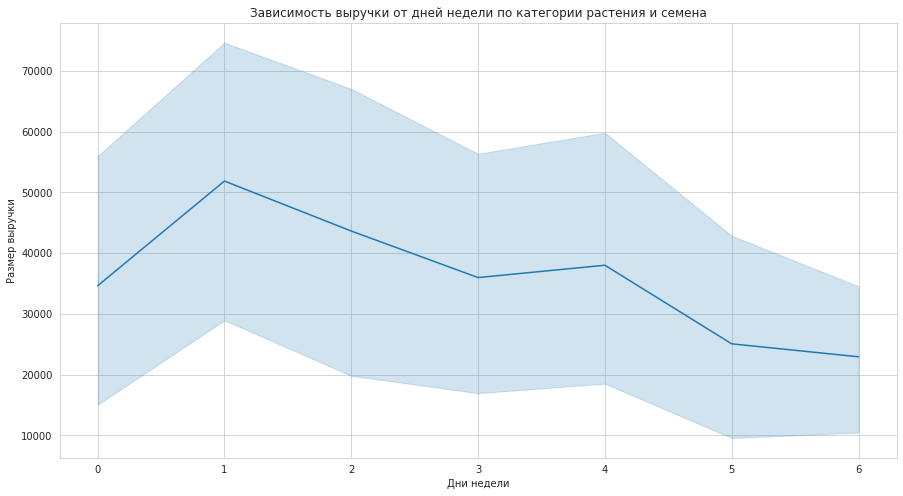

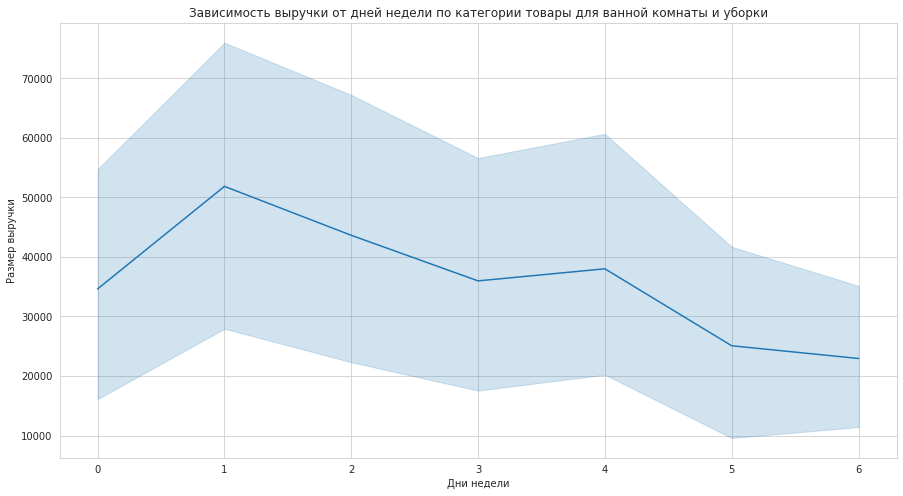

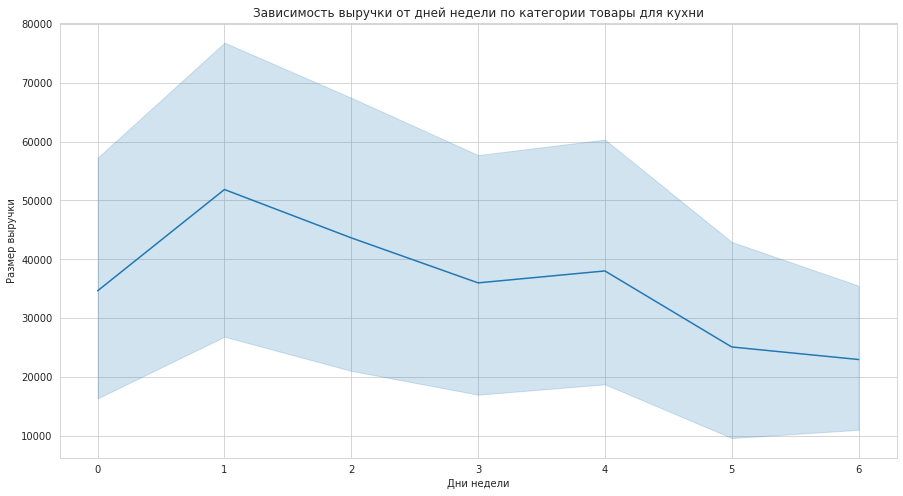

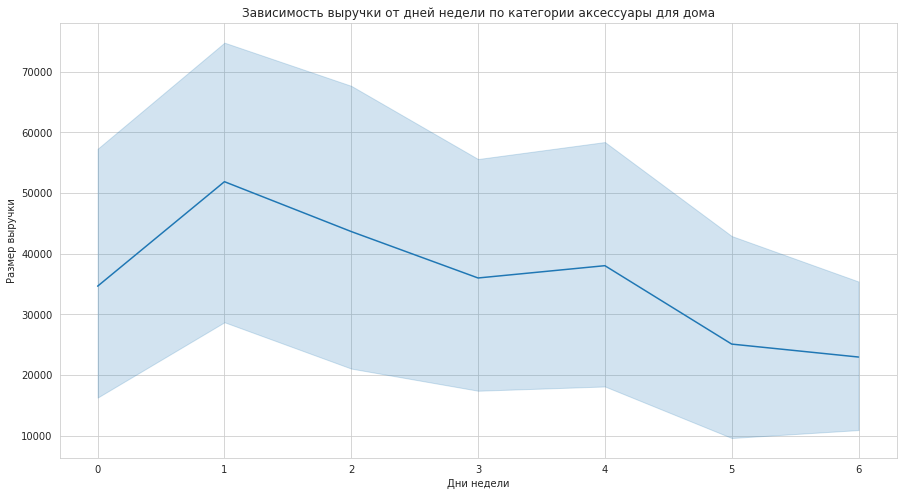

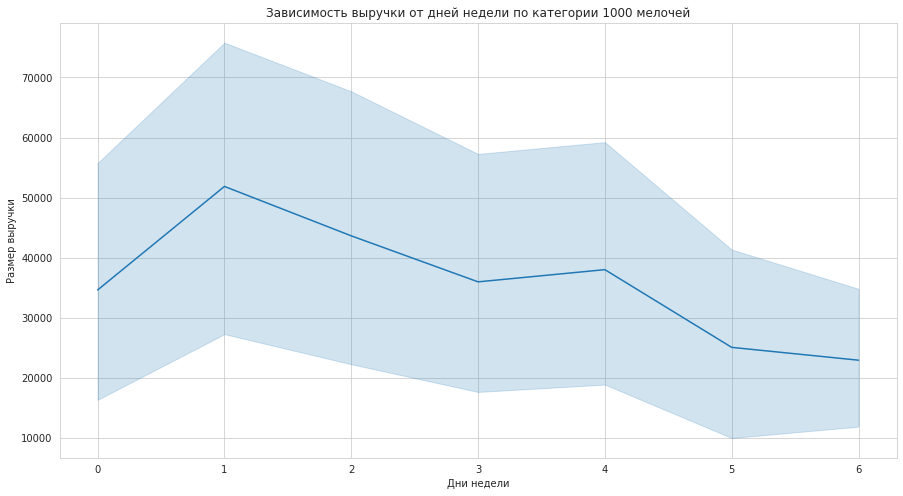

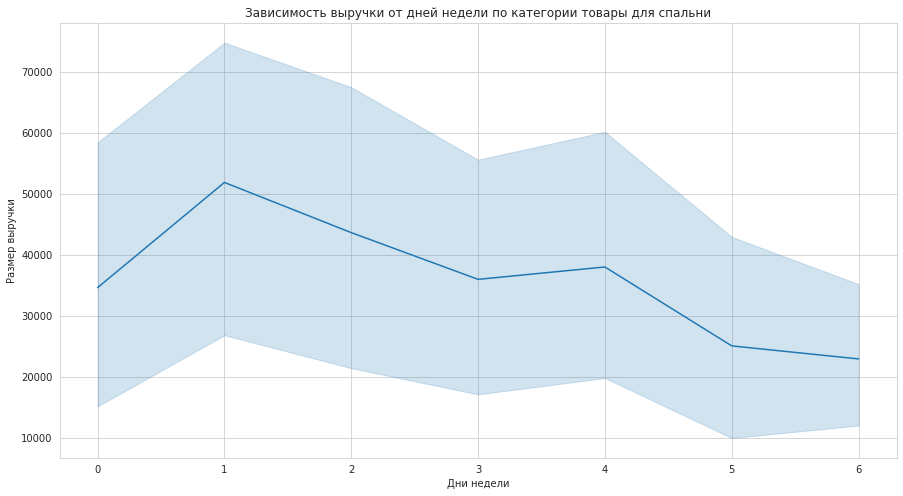

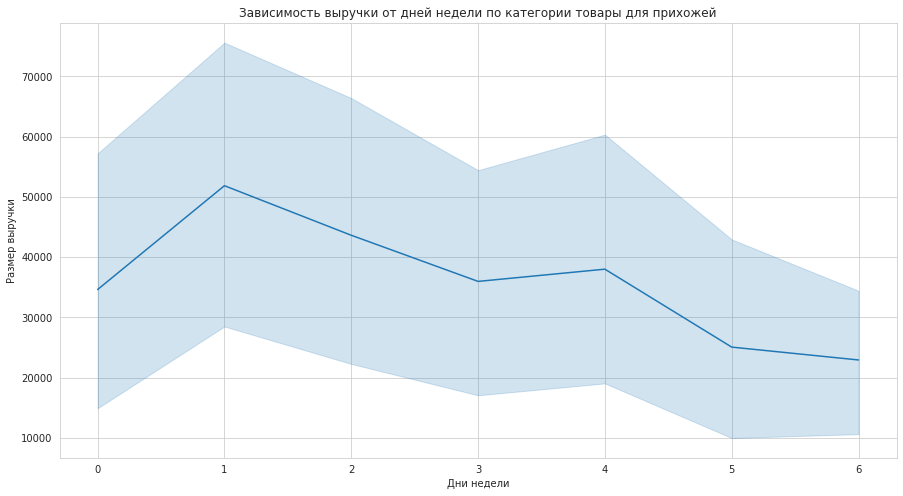

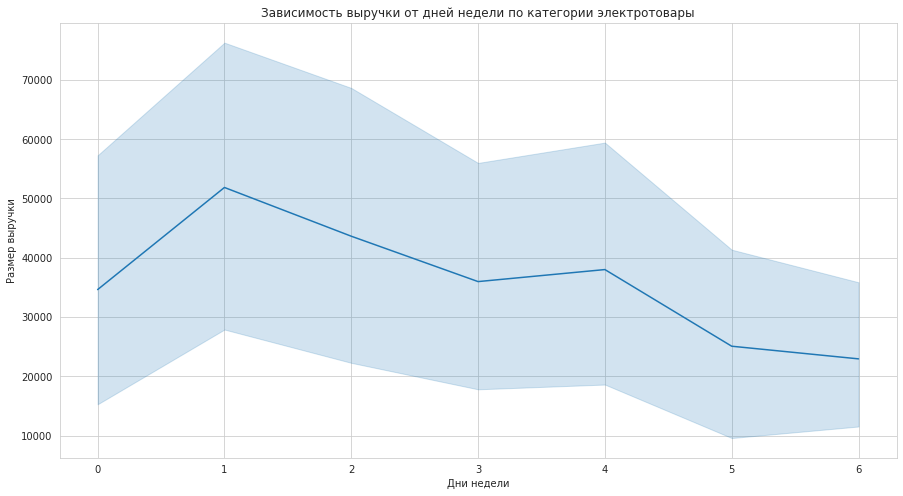

In [57]:
product_category =['растения и семена','товары для ванной комнаты и уборки','товары для кухни','аксесcуары для дома','1000 мелочей','товары для спальни','товары для прихожей', 'электротовары']
for i in range(len(product_category)):
        plt.figure(figsize=(15,8))
        sns.lineplot(data=dayweek_revenue_cat, x="day week", y="revenue")
        plt.xlabel('Дни недели')
        plt.ylabel('Размер выручки')
        plt.title(f'Зависимость выручки от дней недели по категории {product_category[i]}');   

Из графиков видно, что во вторник,в пятницу ,в воскресение наблюдается рост выручки.

Построим матрицу корреляции для данных по ассортименту.

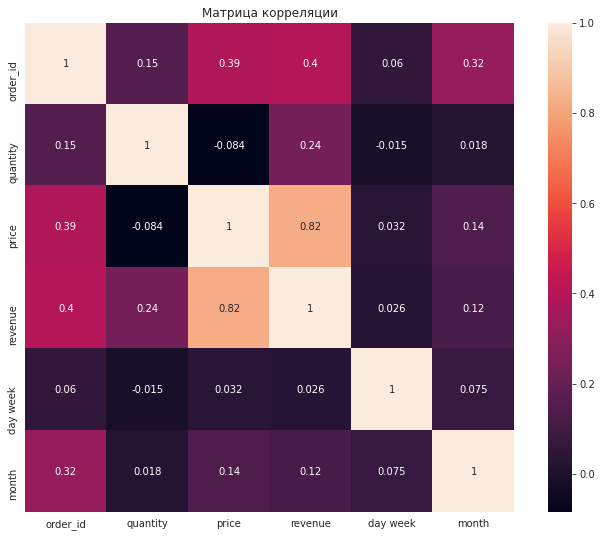

In [58]:
cm=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляции')
plt.show()

     Матрица корреляции показывает нам взаимосвязь признаков с целевой переменной,т.е выручкой. Чем ближе коэффициент к 1 , тем сильнее взаимосвязь признаков.
     Из матрицы видно, что  выручка высоко коррелирует с ценой товара - коэффициент составляет 0.82, если пользоваться шкалой Чеддока. Также заметно ,что выручка слабо взаимосвязана от количества товара, коэффициент 0.24.


### АВС анализ

In [59]:
df_cat

,product_category,revenue
0,товары для ванной комнаты и уборки,1069282.0
1,аксесcуары для дома,824519.0
2,растения и семена,529734.0
3,товары для кухни,418224.0
4,1000 мелочей,217671.0
5,товары для прихожей,200980.0
6,товары для спальни,67527.0
7,электротовары,19805.0


In [60]:
df_cat['share of total revenue']= round((df_cat['revenue']/sum(df_cat['revenue'])*100),2)
df_cat

,product_category,revenue,share of total revenue
0,товары для ванной комнаты и уборки,1069282.0,31.94
1,аксесcуары для дома,824519.0,24.63
2,растения и семена,529734.0,15.82
3,товары для кухни,418224.0,12.49
4,1000 мелочей,217671.0,6.50
5,товары для прихожей,200980.0,6.00
6,товары для спальни,67527.0,2.02
7,электротовары,19805.0,0.59


In [61]:
df_cat['cum_sum'] = round(df_cat['share of total revenue'].cumsum (),0)
df_cat


,product_category,revenue,share of total revenue,cum_sum
0,товары для ванной комнаты и уборки,1069282.0,31.94,32.0
1,аксесcуары для дома,824519.0,24.63,57.0
2,растения и семена,529734.0,15.82,72.0
3,товары для кухни,418224.0,12.49,85.0
4,1000 мелочей,217671.0,6.50,91.0
5,товары для прихожей,200980.0,6.00,97.0
6,товары для спальни,67527.0,2.02,99.0
7,электротовары,19805.0,0.59,100.0


В пятом столбце обозначим принадлежность к соответствующей группе. Позиции, совокупный процент которых составляет до 80%, относятся к группе А, 80-95% — к группе В, 95-100% — к группе С.

Создадим функцию для установления вида группы.

In [62]:
def analysis_groups(row):
    analysis = row['cum_sum']
    if analysis< 80.0:
        return 'A'
    if 80.0<= analysis<95.0:
        return 'B'
    else: return 'C'
df_cat['groups'] = df_cat.apply(analysis_groups, axis=1)

df_cat



,product_category,revenue,share of total revenue,cum_sum,groups
0,товары для ванной комнаты и уборки,1069282.0,31.94,32.0,A
1,аксесcуары для дома,824519.0,24.63,57.0,A
2,растения и семена,529734.0,15.82,72.0,A
3,товары для кухни,418224.0,12.49,85.0,B
4,1000 мелочей,217671.0,6.50,91.0,B
5,товары для прихожей,200980.0,6.00,97.0,C
6,товары для спальни,67527.0,2.02,99.0,C
7,электротовары,19805.0,0.59,100.0,C


     Вывод: Категории товаров группы А являются целевыми,т.е на них нужно сосредоточиться и больше закупать.
    Из таблицы видно,что это такие категории-товары для ванной, акссесуары для дома и растения и семена. 
      Категории товаров группы B приносят меньше выручки,но они расширяют ассортиментов товаров и обеспечивают стабильную выручку.К ним относятся товары для кухни и 1000 мелочей.
      Категории товаров  группы С не приносят выручки. К группе С относятся товары для прихожей, товары для спальни и электротовары. Возможно,в данных категорий стоит снизить ассортимент или отказаться от них.

## Рассмотрим покупателей

Отсортируем  покупателей по количеству заказов.

In [63]:
customers=data.pivot_table(index='customer_id',values='order_id',aggfunc='count').sort_values(by='order_id',ascending= False).reset_index()
customers

,customer_id,order_id
0,d3b9ffea-d143-4747-8d59-74ab843d1ad6,51
1,760aa067-90c3-4794-b7a9-a8831197388b,36
2,2a0acc09-e343-4f92-b5c0-f598ef2b07d4,31
3,3d5fef90-4a65-4a7e-84cf-010eba7b038d,30
4,a3394ff2-4cd2-4332-9f6c-2668ac608fbc,30
...,...,...
1501,5c58e738-90c5-4478-93a5-f5907be45877,1
1502,5c453ae5-74c1-4a89-b6a2-277b0b393434,1
1503,5bee7748-a089-4d7c-a1ad-075cd8846a41,1
1504,5bbd2c0c-d93f-4ffe-b08c-0267dd881317,1


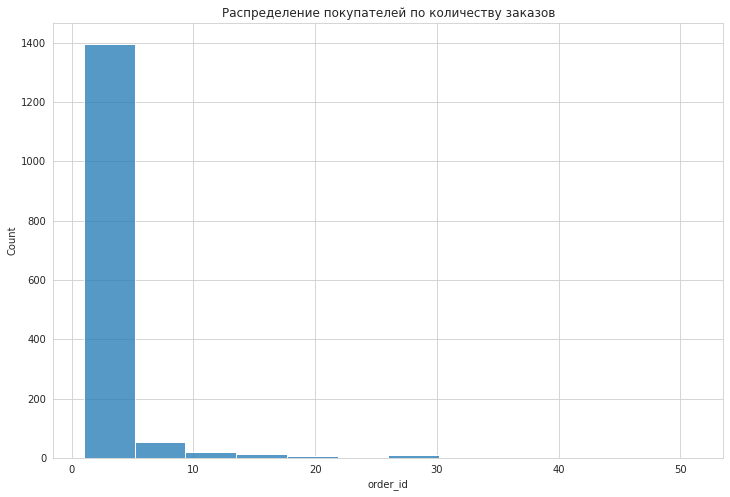

In [64]:
    plt.figure(figsize=(12,8))
    sns.histplot(customers['order_id'])
    plt.title('Распределение покупателей по количеству заказов')
    plt.show()


Из графика видно, что основная часть покупателей делает от 1 до 5 заказов.

Теперь подробней рассмотрим покупателей, которые делают больше одного заказа.

In [65]:
top_customers=customers.query('order_id>1')
len(top_customers)

292

292 покупателя сделали больше одного заказа. Посмотрим на распределение по заказам.

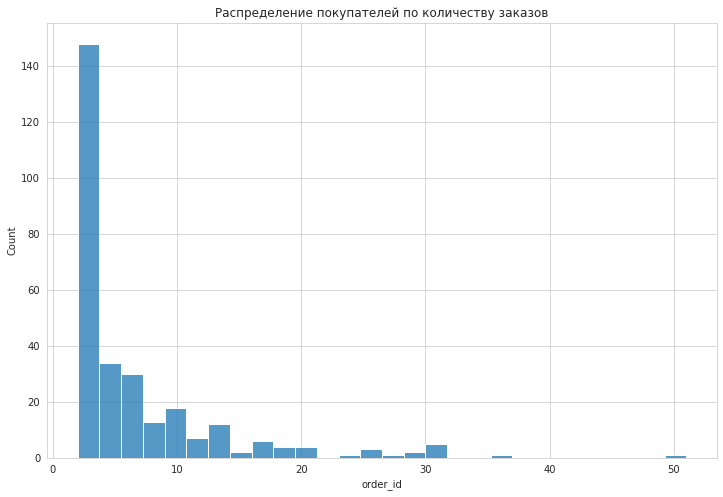

In [66]:
    plt.figure(figsize=(12,8))
    sns.histplot(top_customers['order_id'])
    plt.title('Распределение покупателей по количеству заказов')
    plt.show()

Из графика видно,что 145 покупателей сделали 2 заказа, 36 покупателей - 4 заказа.

Рассотрим от чего зависит количество покупателей.

In [67]:
df=data.groupby('date').agg({'customer_id':'count'}).sort_values(by='customer_id',ascending= False).reset_index()
df.head()

,date,customer_id
0,2019-04-27 16:00:00,51
1,2019-04-24 21:00:00,44
2,2019-05-13 15:00:00,36
3,2019-05-02 16:00:00,36
4,2019-06-05 09:00:00,32


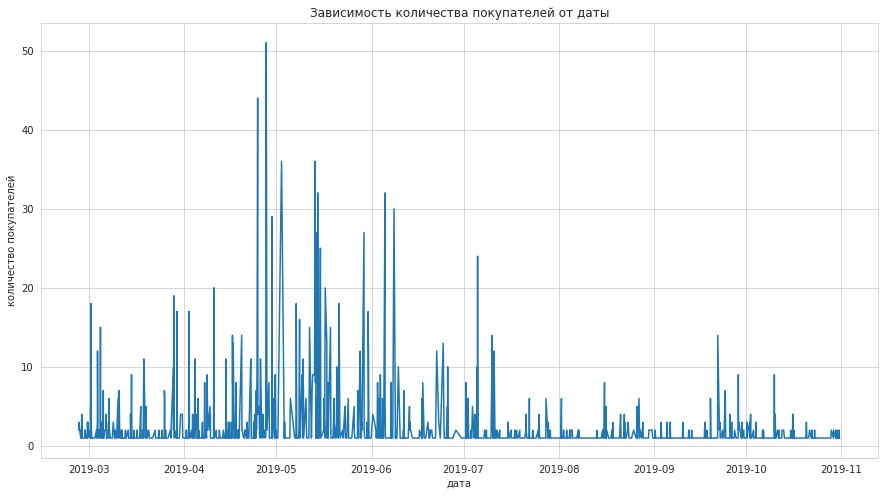

In [68]:
        plt.figure(figsize=(15,8))
        sns.lineplot(data=df, x="date", y="customer_id")
        plt.xlabel('дата')
        plt.ylabel('количество покупателей')
        plt.title(f'Зависимость количества покупателей от даты');   

Из графика видно, что количество покупателей зависит от месяца покупки. В мае заметен рост числа покупателей в связи с началом дачного сезона.

Теперь рассмотрим количество покупателей от цены товаров.

In [69]:
pc= data.groupby('price').agg({'customer_id':'count'}).sort_values(by='customer_id',ascending= False).reset_index()


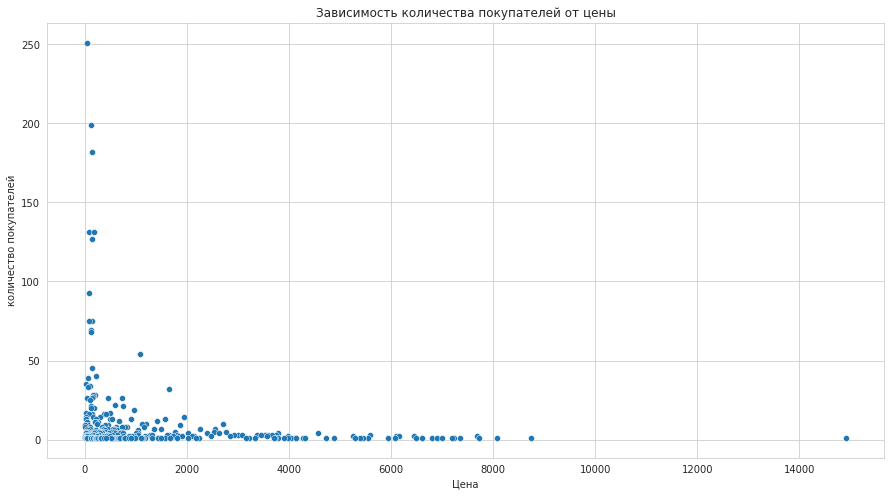

In [70]:
        plt.figure(figsize=(15,8))
        sns.scatterplot(data=pc, x="price", y="customer_id")
        plt.xlabel('Цена')
        plt.ylabel('количество покупателей')
        plt.title(f'Зависимость количества покупателей от цены');   

Из графика видно, что основная часть покупателей сосредоточена до цены 2000, далее чем выше цена товара,тем ниже количество покупателей.

Посчитаем коэффициент корреляции.

In [71]:
pc['price'].corr(pc['customer_id'])

-0.20020271100010006

Коэффициент отрицательный , это говорит от том,что взаимосвязь противоположная.

Вывод, что на количество покупателей влияет месяц покупки,т.е сезонность, и цена товара.

### Формирование и проверка статистических гипотез
4.1  Н0- Среднее количество проданных товаров основной категории равно среднему количеству дополнительной категории.
 H1- Среднее количество проданных товаров основной категории различается от  среднему количеству дополнительной.


     Разделим категории на основные и дополнительные. Основными категориями будут являться растения и семена, товары для ванной и уборки, товары для кухни и акссесуары для дома.А дополнительными остальные категории- товары для прихожей, товары для спальни, 1000 мелочей,электротовары.

In [72]:
data_main= data[data['product_category'].isin(['товары для ванной комнаты и уборки', 'аксесcуары для дома','растения и семена','товары для кухни'])]
data_additional= data[data['product_category'].isin(['1000 мелочей', 'товары для прихожей','товары для спальни','электротовары'])]

In [73]:
from scipy import stats as st
import numpy as np

sample_1 = data_main['quantity']
sample_2 =data_additional['quantity']
alpha = .05 
results = st.ttest_ind(
    sample_1,sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.0009258116459345693
Отвергаем нулевую гипотезу


Значит мы отвергаем нулевую гипотезу , это значит , что среднее количество товаров основной категории и дополнительной категории различны.

H0- Средняя выручка товаров основной категории равна средней выручке дополнительной категории.
H1- Средняя выручка товаров основной категории различается от средней выручки дополнительной категории.


In [74]:
sample_1 = data_main['revenue']
sample_2 =data_additional['revenue']
alpha = .05 
results = st.ttest_ind(
    sample_1,sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 3.787001482910175e-09
Отвергаем нулевую гипотезу


Проверкой мы отвергаем нулевую гипотезу, значит средняя выручка товаров основной категории различается от средней выручки дополнительной категории.

### Общий вывод

       В данном проекте проведен  анализ товарного ассортимента, в частности:
        - провели исследовательский анализ данных;
        - проанализировали торговый ассортимент;
        - сформулировали и проверили статистические гипотезы.
         
            Ассортимент товаров был разделен на 8 категорий: 
    -растения и семена,
    -товары для ванной и уборки,
    -товары для кухни,
    -акссесуары для дома,
    -товары для прихожей,
    -товары для спальни,
    -1000 мелочей,
    -электротовары.
       По размеру выручки можно выделить топ-5 категорий- аксессуары для дома,растения и семена,товары для ванной, товары для кухни,1000 мелочей. 
      По количеству продаж другие лидеры- это категории- растения и семена,товары для кухни, товары для ванной,акссесуары для дома, 1000 мелочей.
       Рассмотрели количество продаж по месяцам- обнаружили сезонность, в апреле и мае  продажи растут. 
       В апреле и мае продажи повышаются за счет категории растения и семена, это объясняется наступлением дачного сезона.
     
       Рассмотрели зависимость количества продаж от дня недели.В понедельник продажи больше,чем в другие дни. В четверг наблюдается небольшой рост, а затем снижение до субботы, а в воскресение снова заметен  рост.
       Во вторник и в пятницу наблюдается рост средней выручки.
       Построили матрицу корреляции, которая показывает нам взаимосвязь признаков с целевой переменной,т.е выручкой. Чем ближе коэффициент к 1 , тем сильнее взаимосвязь признаков.
       Из матрицы видно, что  выручка средне коррелирует с ценой товара - коэффициент составляет 0.82, если пользоваться шкалой Чеддока. Также заметно ,что выручка слабо взаимосвязана от количества товара, коэффициент 0.24.
   
    Проверили две статистические гипотезы:
        первая-
        Н0- Среднее количество проданных товаров основной категории равно среднему количеству дополнительной категории.
        H1- Среднее количество проданных товаров основной категории различается от  среднему количеству дополнительной.
        
        вторая-
        H0- Средняя выручка товаров основной категории равна средней выручке дополнительной категории.
        H1- Средняя выручка товаров основной категории различается от средней выручки дополнительной категории.
        
     Проверкой мы отвергаем нулевые гипотезы, значит:
        -среднее количество товаров основной категории и дополнительной категории различны.
        -средняя выручка товаров основной категории различается от средней выручки дополнительной категории.   

        
      Исходя из всего сказанного, можно сформировать следующие рекомендации:
       
    -нужно расширять ассортимент категорий товаров группы А-это такие категории-товары для ванной, акссесуары для дома и растения и семена.
    - сокращать товарный ассортимент категории товаров  группы С,которые не приносят выручки. К группе С относятся товары для прихожей, товары для спальни и электротовары.
    